<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [4]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [5]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-5-975bf9c6861f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [6]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [7]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [8]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


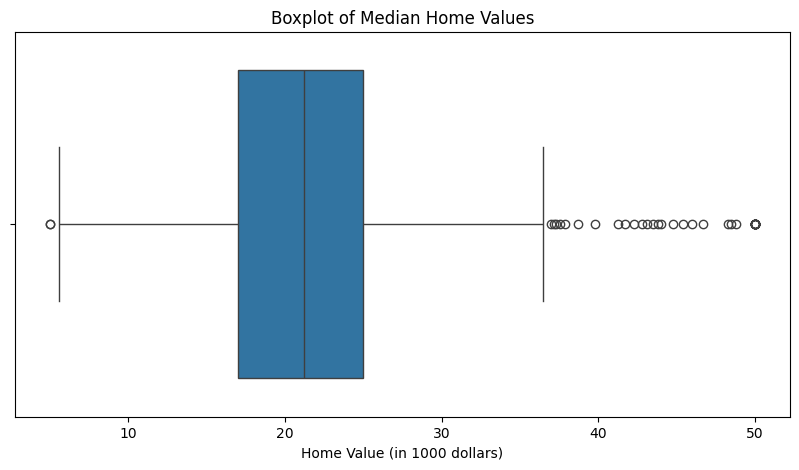

In [9]:
## First, we'll use a Box plot to visualize the median value of these properties
plt.figure(figsize=(10, 5))
sns.boxplot(x=boston_df['MEDV'])

# Customize the plot
plt.title('Boxplot of Median Home Values')
plt.xlabel('Home Value (in 1000 dollars)')

# Show the plot
plt.show()

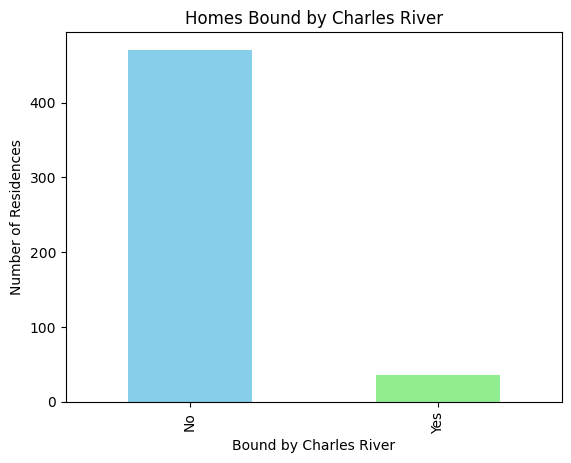

In [10]:
##Let's see how many of these houses are bound by the Charles River!
# Count the occurrences of each value (0 and 1), in this case 0 meaning NO and 1 meaning YES
binary_counts = boston_df['CHAS'].value_counts()

# Create a bar plot
binary_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.xticks(ticks=[0.0, 1.0], labels=['No', 'Yes'])
# Add labels and title
plt.xlabel('Bound by Charles River')
plt.ylabel('Number of Residences')
plt.title('Homes Bound by Charles River')

# Show the plot
plt.show()


<h2><b><u>Item one:</u></b> Is there a significant difference in the median value of houses bounded by the Charles river or not?</h2>

<h5>     Our null hypothesis is: There's <i>no</i> meaningful difference in the median value of houses bound by the Charles river</h5>
<h5>     Our alternative hypothesis is: There <i>is</i> a meaningful difference</h5>

<ipython-input-11-02df23c7e072>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df['MEDV'],


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

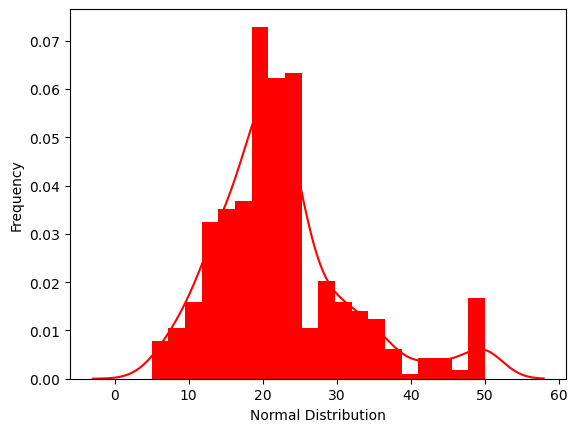

In [11]:
## First, let's use a histogram visualization to check for the "bell-curve" we'd find in a normal distribution of the 
## dependent variable.  In this case that variable is "MEDV".

ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

In [12]:
##In the words of Hank Hill, "That ain't normal."
##Next let's start by using a Levene's Test to ascertain equality of variance

scipy.stats.levene(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [13]:
##It looks like our p-value is UNDER 0.05 and thus we do not have equality of variance
##Next let's run the T-Test, noting that "equal_var = False" 
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var = False)



TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

<h4>So, given the p score is less than 0.05, it appears there's a significant statistical difference between houses bound by the Charles River and those that are not.</h4>

<h2><b><u>Item two:</b></u> Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?</h2>

<h5>Our null hypothesis is that there is <i>no</i> difference in the MEDV for each proportion</h5>
<h5>Our alternate hypothesis is that there <i>is</i> a difference in the MEDV for each proportion</h5>



<h6>Per the instructions we want to the divide the age category into three different groups: <35, 35-70, and >70</h6>

In [14]:
boston_df.loc[(boston_df['AGE'] < 35), 'age_group'] = 'Under 35 years'
boston_df.loc[(boston_df['AGE'] >= 35)&(boston_df['AGE'] <= 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] > 70), 'age_group'] = 'Over 70 years'

##Then let's test for equality of variance
scipy.stats.levene(boston_df[boston_df['age_group'] == 'Under 35 years']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == 'Over 70 years']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

<h5>The p value is over 0.05 and so we have equality of variance</h5>

In [15]:
## Next we'll create a group of variables representing the Median Value for each age group:

under35 = boston_df[boston_df['age_group'] == 'Under 35 years']['MEDV']
between35and70 = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
over70 = boston_df[boston_df['age_group'] == 'Over 70 years']['MEDV']

## Finally, we'll run the one way Anova
f_statistic, p_value = scipy.stats.f_oneway(under35, between35and70, over70)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


<h5>As the P-value is waaaaaay under 0.05 there seems to be some statistically meaningful difference in the means</h5>

<AxesSubplot:xlabel='MEDV', ylabel='age_group'>

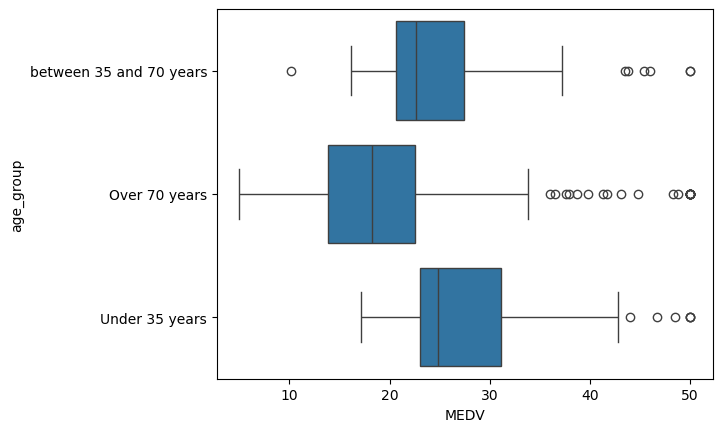

In [16]:
## Next let's generate a graphical representation of the median value by age groups
ax = sns.boxplot(x="MEDV", y="age_group", data=boston_df)
ax

<h2><b><u>Item Three:</b></u> Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?</h2>

<h5>On item three our null hypothesis is: There is <i>no</i> correlation between INDUS and NOX.<br></h5>
<h5>Our alternative hypothesis is that there <i>is</i> a correlation between INDUS and NOX</h5>

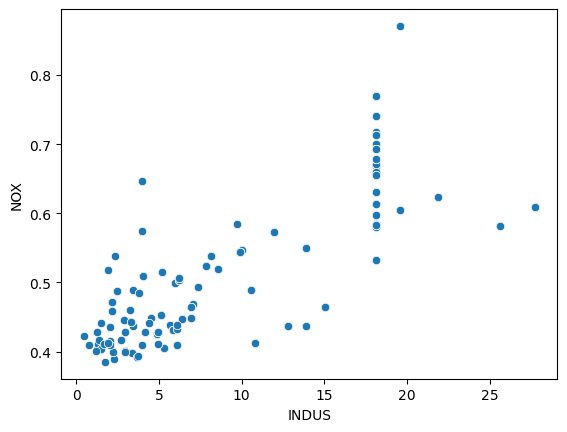

In [17]:
## For this item we'll be using a Pearson correlation test and visualizing with a scatterplot.  We'll start with the latter:

item3scatter = sns.scatterplot(x="INDUS", y="NOX", data=boston_df)


In [18]:
## Now, the Pearson correlation

scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

<h4>Since the p-value is less than 0.05, we'll reject the null hypothesis and must conclude that there is some statistically significant correlation between INDUS and NOX</h4>

<h2><b><u>Item Four:</u></b> What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?</h2>

<h5>On item four our null hypothesis is: There is <i>no</i> significant impact of DIS on MEDV.<br></h5>
<h5>Our alternative hypothesis is that there <i>is</i> a significant impact of DIS on MEDV</h5>

<ipython-input-20-e6ebaa0042c4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df['DIS'],


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

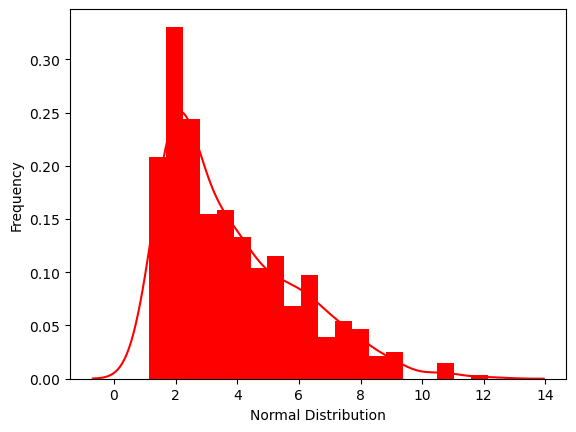

In [20]:
## First, let's visualize the variable DIS with a histogram

ax = sns.distplot(boston_df['DIS'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

In [22]:
## Next let's evaluate with regression analysis

## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        14:31:54   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h5>It appears that there is a statistical difference between MEDV and DIS</h5>